In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')
sns.set_context('talk')

# Exercise 1

1. 

In [2]:
# Set the seed as last four digits of matriculation number 408092
np.random.seed(8092)

# Generate a random matrix A of size NxN
N = 6
A = np.random.uniform(-5, 5, size=(N, N))

2. 

In [3]:
# Find the maximum value of the matrix A
maximum_value = np.max(A)

# Find the indices of the maximum value of the matrix A
indices_maximum_value = np.unravel_index(np.argmax(A), A.shape)

In [4]:
print(f"The maximum value in the matrix is {maximum_value:.3f} at the position {indices_maximum_value}.")

The maximum value in the matrix is 4.921 at the position (1, 1).


3. 

In [5]:
# Row vector containing the maximum value of each column of A
row_vector = np.max(A, axis=0, keepdims=True)

# Column vector containing the maximum value of each row of A
column_vector = np.max(A, axis=1, keepdims=True)

In [6]:
# Inner product of row and column vectors
row_vector@column_vector

array([[63.24778202]])

In [7]:
# Outer product of row and column vectors
column_vector@row_vector

array([[ 4.48677614,  4.78198353,  2.71631393,  1.77889798,  3.64541335,
         4.72964663],
       [22.71872794, 24.21350643, 13.75401742,  9.00742495, 18.45849927,
        23.94849929],
       [17.31899609, 18.45849927, 10.4849961 ,  6.86656216, 14.07132818,
        18.25647839],
       [22.47008056, 23.94849929, 13.60348521,  8.90884229, 18.25647839,
        23.68639256],
       [ 3.74239777,  3.9886288 ,  2.26566401,  1.48377001,  3.04062123,
         3.94497485],
       [11.49102718, 12.24707921,  6.9567182 ,  4.55591375,  9.33622329,
        12.11303983]])

4.

In [8]:
# Generate a random matrix B of size NxN
B = np.random.uniform(-5, 5, size=(N, N))

In [9]:
# Compute the product C of A and B
C = A@B
C

array([[  5.92284909,   4.02402046,  -4.81491191,   0.42243135,
          5.06446086,  -5.44927373],
       [ 37.96528285, -22.48188442, -23.98248626,  -3.10875271,
          1.11932585,  10.16378753],
       [ -8.15300831,  15.69070799,  32.26520122,  -6.41193927,
         -6.4237008 ,  -0.19405244],
       [-29.47862496,   0.94859172,  17.00966113,  -5.16828403,
         -1.11417597, -29.21581236],
       [ -1.12298658,  16.84730905,  -5.36689902,  -4.83595904,
         20.98192798,  -1.49419183],
       [ -9.57101795, -13.59409309,  -4.19700577, -26.26849026,
         17.44752456, -10.95630614]])

In [10]:
# Compute the product D of B and A
D = B@A
D

array([[  9.56646418,  14.41630733,   4.2313279 ,  -0.15832406,
        -10.43192848, -17.18916863],
       [ 14.37379869, -10.21088473,  15.32076081,  -5.06145351,
         25.36806197,  25.45056363],
       [ -5.64489515,   1.4306974 ,  -0.21445387,  -1.27569379,
         10.25861864,  21.31469763],
       [ -1.3434481 ,  12.86742142, -14.70898195,  -0.90096212,
        -19.27926453,  -3.99751098],
       [ -2.67964002,  -7.31403176,  -6.18940362, -12.30824025,
         16.46524994,  12.34138408],
       [-21.04854761,   6.44092155,  14.93472911,  21.30920389,
         24.27119778,   5.85809031]])

# Exercise 2

In [11]:
def cheby(x, N):
    """
    Compute the Chebyshev polynomials up to degree N for the given input x.

    Parameters:
    x (ndarray): Input array of shape (n, 1).
    N (int): Degree of the Chebyshev polynomials.

    Returns:
    ndarray: Array of shape (n, N+1) containing the computed Chebyshev polynomials.

    """
    # Flatten the input array
    x = x.flatten()

    # Initialize the results array
    result = np.zeros((x.shape[0], N+1))

    # Compute the Chebyshev polynomials

    # First two Chebyshev polynomials
    result[:, 0] = 1
    result[:, 1] = x

    # Compute the remaining Chebyshev polynomials
    for i in range(2, N+1):
        # T_n(x) = 2*x*T_{n-1}(x) - T_{n-2}(x)
        result[:, i] = 2*x*result[:, i-1].flatten() - result[:, i-2].flatten()
        
    return result

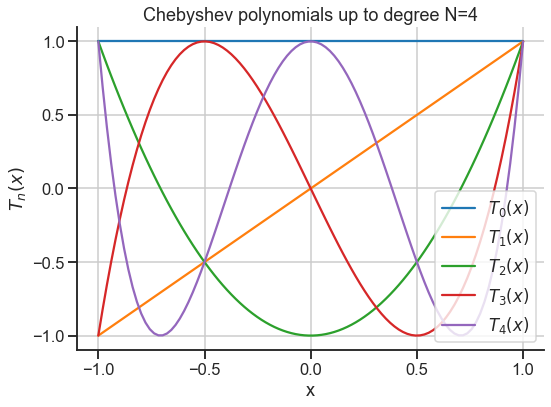

In [12]:
# Plot the Chebyshev polynomials up to degree N
DEGREE = 4
xs = np.linspace(-1, 1, 100).reshape(-1, 1)
ys = cheby(xs, DEGREE)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(xs, ys, label=[f"$T_{i}(x)$" for i in range(DEGREE+1)])

ax.set_xlabel("x")
ax.set_ylabel(r"$T_n(x)$")

ax.set_xticks(np.linspace(-1, 1, 5))
ax.set_yticks(np.linspace(-1, 1, 5))

ax.set_title(f"Chebyshev polynomials up to degree N={DEGREE}")
ax.legend(loc="lower right")

ax.grid()

sns.despine()
plt.tight_layout()
plt.show()